# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

## Sample code

   You can use the sample code provided below:

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

def plot_results(f1, f2, num_points, epoch, trajectories, loss_history=None, loss_name="L2"):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')

    f1 = f1.detach().cpu().numpy()
    f2 = f2.detach().cpu().numpy()
    
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title(f"Loss {loss_name} Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

TESTING LOSS_2
LOSS_2 = 11.102331161499023
Epoch 0: Loss = 11.102331
LOSS_2 = 9.814557075500488
LOSS_2 = 8.638322830200195
LOSS_2 = 7.569506645202637
LOSS_2 = 6.605299472808838
LOSS_2 = 5.741456985473633
LOSS_2 = 4.971599578857422
LOSS_2 = 4.28804874420166
LOSS_2 = 3.682936429977417
LOSS_2 = 3.148989200592041
LOSS_2 = 2.6797056198120117
LOSS_2 = 2.2691564559936523
LOSS_2 = 1.911806344985962
LOSS_2 = 1.6025341749191284
LOSS_2 = 1.336663842201233
LOSS_2 = 1.1098681688308716
LOSS_2 = 0.9180131554603577
LOSS_2 = 0.757045567035675
LOSS_2 = 0.6229733228683472
LOSS_2 = 0.5119855403900146
LOSS_2 = 0.42063698172569275
LOSS_2 = 0.3459513783454895
LOSS_2 = 0.2853809595108032
LOSS_2 = 0.23671430349349976
LOSS_2 = 0.19801869988441467
LOSS_2 = 0.16760990023612976
LOSS_2 = 0.14402033388614655
LOSS_2 = 0.12595443427562714
LOSS_2 = 0.11225789040327072
LOSS_2 = 0.10191699117422104
LOSS_2 = 0.0940767228603363
LOSS_2 = 0.0880541205406189
LOSS_2 = 0.0833297073841095
LOSS_2 = 0.07951953262090683
LOSS_2 = 0.

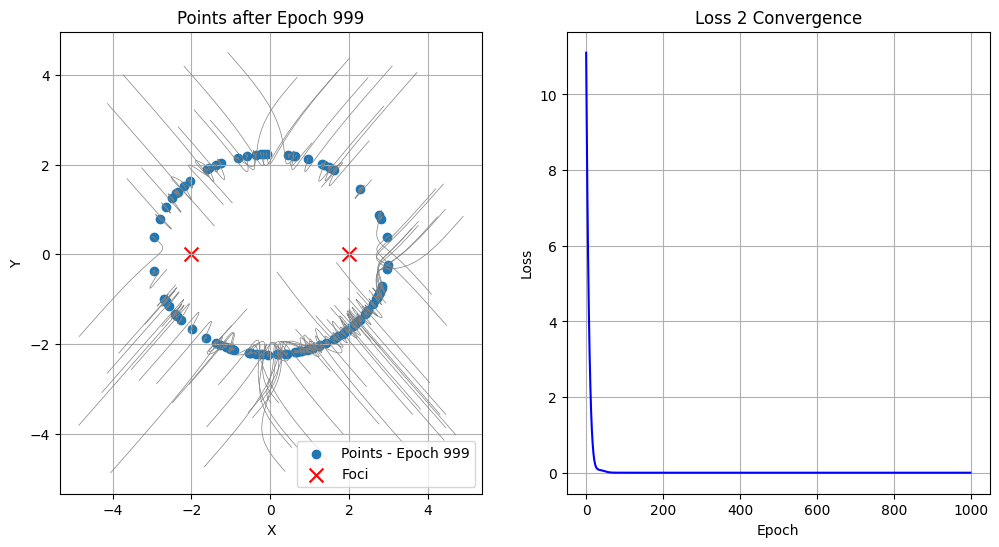

Elapsed time: 2.6235625743865967 seconds
TESTING LOSS_inf
LOSS_inf = 7.6091156005859375
Epoch 0: Loss = 7.609116
LOSS_inf = 7.334600448608398
LOSS_inf = 7.060512542724609
LOSS_inf = 7.0377960205078125
LOSS_inf = 6.878841400146484
LOSS_inf = 6.840047836303711
LOSS_inf = 6.733423233032227
LOSS_inf = 6.595314979553223
LOSS_inf = 6.5328216552734375
LOSS_inf = 6.46112060546875
LOSS_inf = 6.387818336486816
LOSS_inf = 6.260555267333984
LOSS_inf = 6.212240219116211
LOSS_inf = 6.079922676086426
LOSS_inf = 6.051761627197266
LOSS_inf = 5.950632095336914
LOSS_inf = 5.922519683837891
LOSS_inf = 5.79682731628418
LOSS_inf = 5.729111671447754
LOSS_inf = 5.648578643798828
LOSS_inf = 5.612359046936035
LOSS_inf = 5.536457061767578
LOSS_inf = 5.45210075378418
LOSS_inf = 5.376075744628906
LOSS_inf = 5.359086990356445
LOSS_inf = 5.238402366638184
LOSS_inf = 5.136547088623047
LOSS_inf = 5.022076606750488
LOSS_inf = 5.02165412902832
LOSS_inf = 4.963441848754883
LOSS_inf = 4.948515892028809
LOSS_inf = 4.923830

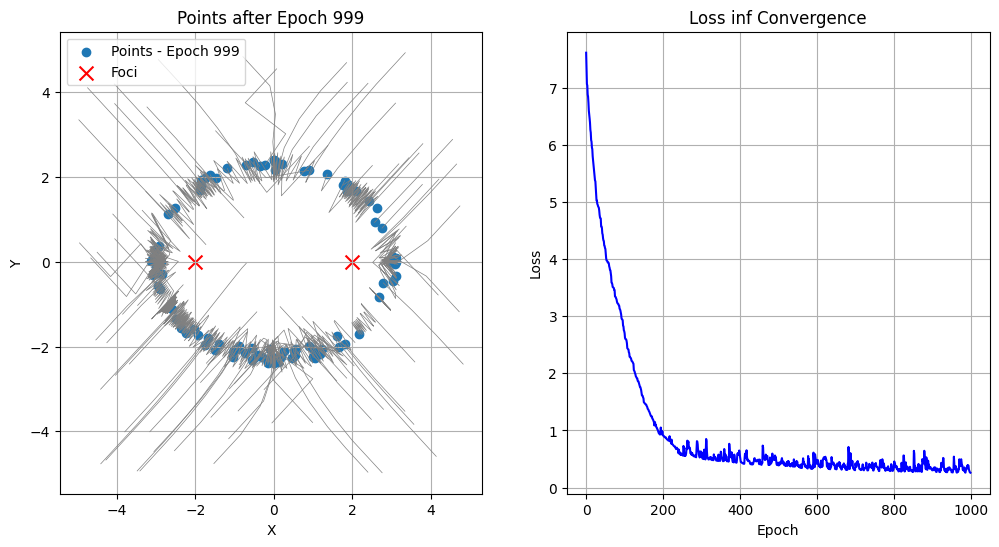

Elapsed time: 2.3139865398406982 seconds


In [35]:
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

losses = {
            # 0:lambda eps: torch.mean((eps > 0).float()),
            # 1:lambda eps: torch.mean(torch.abs(eps)),
            2:lambda eps: torch.mean((eps) **2),
        "inf":lambda eps: torch.max(torch.abs(eps))
         }
# Training loop

for name, loss_fn in losses.items():
    # Initialize random 2D points from uniform distribution
    num_points = 100
    points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
    points.requires_grad = True
    optimizer = torch.optim.Adam([points], lr=0.1)

    print(f"TESTING LOSS_{name}")
    num_epochs = 1000

    # Reset trajectories
    trajectories = [[] for _ in range(num_points)]
    loss_history = []
    start_time = time.time()


    for epoch in range(num_epochs):
        optimizer.zero_grad()

    
        dist1 = torch.norm(points - focus1, dim=1)
        dist2 = torch.norm(points - focus2, dim=1)

        # l_0, l_1 and l_infty - related loss
        eps = dist1 + dist2 - constant_sum
        loss = loss_fn(eps)
        print(f"LOSS_{name} = {loss}")

        try:
            loss.backward()
            optimizer.step()
        except RuntimeError:
            print(f"Loss_{name} nie ma gradientu")

        loss_history.append(loss.item())

        # Store current positions for tracking movement
        for i in range(num_points):
            trajectories[i].append(points[i].detach().cpu().clone().numpy())

        # Plot results every 10th epoch
        if epoch % 100 == 0:
            # plot_results(focus1, focus2, num_points, epoch, trajectories, loss_history)
            pass
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

    #Final plot
    plot_results(focus1, focus2, num_points, epoch, trajectories, loss_history, loss_name=name)

    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f"Elapsed time: {elapsed_time} seconds")